<a href="https://colab.research.google.com/github/Haseebi-khan/MachineLearning/blob/LearningML/machinelearning2_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Expenditure: Independent Variable  
Sale: Dependent Variable  
You need to check if there is a relationship between the advertising budget and sales.  
How strong is the relationship?  
Is it linear?  
How accurately can you predict future values?

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv( r"D:\Codes\Python\MachineLearning\Datasets\advertising1D.csv" )

print(df)

     expenditure  sales
0          337.1   22.1
1          128.9   10.4
2          132.4    9.3
3          251.3   18.5
4          250.0   12.9
..           ...    ...
195         55.7    7.6
196        107.2    9.7
197        192.7   12.8
198        391.8   25.5
199        249.4   13.4

[200 rows x 2 columns]


In [102]:
df.describe

<bound method NDFrame.describe of      expenditure  sales
0          337.1   22.1
1          128.9   10.4
2          132.4    9.3
3          251.3   18.5
4          250.0   12.9
..           ...    ...
195         55.7    7.6
196        107.2    9.7
197        192.7   12.8
198        391.8   25.5
199        249.4   13.4

[200 rows x 2 columns]>

In [103]:
df.dtypes

expenditure    float64
sales          float64
dtype: object

In [104]:
df.sort_values(by=['expenditure', 'sales'], inplace=True, ascending=[False, False])
df

,expenditure,sales
101,433.6,23.8
183,402.4,26.2
198,391.8,25.5
98,383.2,25.4
17,376.8,24.4
...,...,...
78,44.7,5.3
108,39.1,5.3
132,37.7,5.7
155,21.4,3.2


In [105]:

print("Expenditure max: ",df['expenditure'].max())
print("Expenditure min: ",df['expenditure'].min())
print("Sales max: ",df['sales'].max())
print("Sales min: ",df['sales'].min())

Expenditure max:  433.6
Expenditure min:  11.7
Sales max:  27.0
Sales min:  1.6


In [106]:
print("ex mean:",df["expenditure"].mean())
print("ex std:",df["expenditure"].std())
print("Expenditure std indicate that the value of expenditure are spread out.\n\n")

print("sales mean: ",df["sales"].mean())
print("sales std: ",df["sales"].std())
print("Sales std indicate that the value of sales are not much spread out.")



ex mean: 200.86050000000003
ex std: 92.9851805869837
Expenditure std indicate that the value of expenditure are spread out.


sales mean:  14.0225
sales std:  5.217456565710478
Sales std indicate that the value of sales are not much spread out.


**Covariance:**

In [107]:
print(np.cov(df["expenditure"], df["sales"]))


# [[var(expenditure)           cov(expenditure, sales)]
#  [cov(expenditure, sales)    var(sales)]]


[[8646.24380879  420.96727513]
 [ 420.96727513   27.22185302]]


positive co variance shows that two variable tend to move in the same direction.

**Correlation Co efficient**

In [108]:
print(np.corrcoef(df["expenditure"], df["sales"]))

[[1.        0.8677123]
 [0.8677123 1.       ]]


[[corr(X, X)   corr(X, Y)]

 [corr(Y, X)   corr(Y, Y)]]

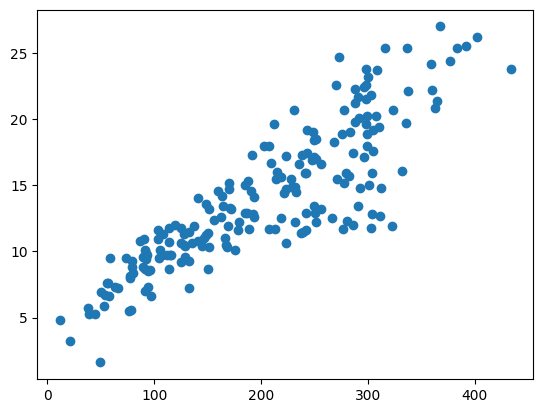

In [109]:
plt.scatter(x=df["expenditure"], y=df["sales"])

# Regression

**Learning formula: y = a + bx + e(i)**

In [110]:
# finding B(Slope):

x = np.array(df["expenditure"])
y = np.array(df["sales"])
nominator = (len(x) * np.sum(x * y)) - (np.sum(x)*np.sum(y))
denomnatoe = (len(x) * np.sum(x**2)) - (np.sum(x)**2)
b = nominator / denomnatoe
print(b)

# 0.04868787931904816

0.04868787931904816


In [111]:
# Finding A:

a = np.mean(y) - b * np.mean(x)

print(a)

# 4.243028216036327

4.243028216036327


<Axes: xlabel='expenditure', ylabel='sales'>

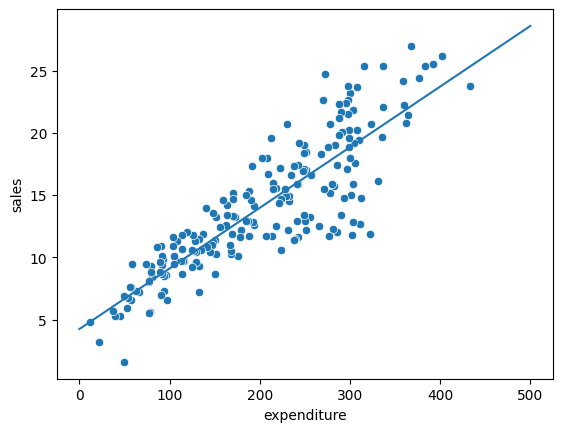

In [112]:

sns.scatterplot(x="expenditure",y="sales",data=df)
xpointsofline = np.linspace(0, 500, 50)
ypointsofline = a + b * xpointsofline
sns.lineplot(x=xpointsofline, y=ypointsofline)

**Predicting Future Values**

Predicted Sales:  22.74442235727463


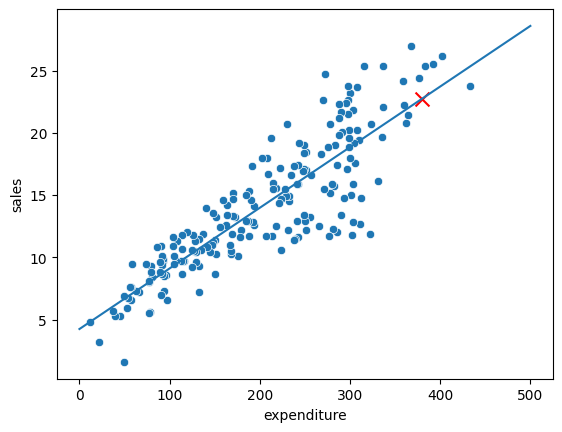

In [ ]:
advertising_expentiture = 380

sales = a + b * advertising_expentiture
print("Predicted Sales: ", sales)
sns.scatterplot(x="expenditure",y="sales",data=df)
xpointsofline = np.linspace(0, 500, 50)
ypointsofline = a + b * xpointsofline
sns.lineplot(x=xpointsofline, y=ypointsofline)

plt.scatter(advertising_expentiture, sales, marker="x", s=100, color="red")



In [114]:
ybar = np.mean(y)
yhat = a + b * x  # Assuming a and b are already defined

mae = (np.sum(np.abs(y - yhat))) / len(y) #
mse = (np.sum((y - yhat)**2)) / len(y)
rmse = np.sqrt((np.sum((y - yhat)**2)) / len(y))
sse = np.sum((y - yhat)**2)
sst = np.sum((y - ybar)**2)
r2 = 1 - sse/sst


print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2: {r2:.3f}")

MAE: 1.950
MSE: 6.692
RMSE: 2.587
R2: 0.753
